In [1]:
import pandas as pd
import numpy as np
import re, os
from string import printable
from sklearn import model_selection
import tensorflow as tf
from keras.models import Sequential, Model, model_from_json, load_model
from keras import regularizers
from keras.layers.core import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import Input, ELU, LSTM, Embedding, Convolution2D, MaxPooling2D, \
BatchNormalization, Convolution1D, MaxPooling1D, concatenate
from keras.preprocessing import sequence
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras import backend as K
from pathlib import Path
import json
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from keras.layers import Bidirectional, SimpleRNN
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard, ModelCheckpoint

Using TensorFlow backend.



## Deep Learning 


Requirements:

- tensorflow 1.4.1
- keras 2.1.2


## Preprocess 

In [2]:
## Load data code_snippet

Al_Boghdady_Binary_Dataset = pd.read_csv('Al_Boghdady_Binary.csv', encoding= 'unicode_escape')
Al_Boghdady_Binary_Dataset.sample(n=10).head(10) 

,code,isMalicious
3852,staticvoid G2 ( ) { if ( gloBAL_CONST_...,0
4272,staticvoid GG2B1 ( ) { char * data ; dat...,0
262,staticvoid badSource ( char * &datafgh ) { ...,1
2620,if ( tm ( fc ) ) { FILE* tmp = fopen ( ...,1
497,void bad ( ) { if ( staticReturnsTrue (...,1


In [3]:
#Dataset Shape
Al_Boghdady_Binary_Dataset.shape

(5080, 2)

In [4]:
# Checking for duplicate rows or null values
Al_Boghdady_Binary_Dataset.dropna(inplace=True)
Al_Boghdady_Binary_Dataset.drop_duplicates(inplace=True)
Al_Boghdady_Binary_Dataset.sample(n=5).head(5) 

,code,isMalicious
4505,staticvoid GG2B ( ) { char * data_value0...,0
549,"int rv = g_set_cb ( name, buf ) ; if ( rv...",1
690,void bad ( ) { if ( 5 == 5 ) { { ...,1
3602,staticvoid G2 ( ) { if ( globalReturns...,0
3227,staticvoid GB2GSource ( char * &data ) { ; ...,0


In [5]:
#Dataset Shape
Al_Boghdady_Binary_Dataset.shape

(4774, 2)

In [6]:
#Dataset tokenization
code_snippet_int_tokens = [[printable.index(x) + 1 for x in code_snippet if x in printable] 
                           for code_snippet in Al_Boghdady_Binary_Dataset.code]
max_len = 150
X = sequence.pad_sequences(code_snippet_int_tokens, maxlen=max_len)
target = np.array (Al_Boghdady_Binary_Dataset.isMalicious)
print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', target.shape)

Matrix dimensions of X:  (4774, 150) Vector dimension of target:  (4774,)


In [7]:
#Split the data set into training and test data
X_train, X_test, target_train, target_test = model_selection.train_test_split(X, target, test_size=0.30, random_state=30)

In [8]:
# Layer dimensions
def print_layers_dims(model):
    l_layers = model.layers
    # Note None is ALWAYS batch_size
    for i in range(len(l_layers)):
        print(l_layers[i])
        print('Input Shape: ', l_layers[i].input_shape, 'Output Shape: ', l_layers[i].output_shape)

# Save model to disk
def save_model(fileModelJSON,fileWeights):
    #print("Saving model to disk: ",fileModelJSON,"and",fileWeights)
    #have h5py installed
    if Path(fileModelJSON).is_file():
        os.remove(fileModelJSON)
    json_string = model.to_json()
    with open(fileModelJSON,'w' ) as f:
        json.dump(json_string, f)
    if Path(fileWeights).is_file():
        os.remove(fileWeights)
    model.save_weights(fileWeights)
    

# Load model from disk 
def load_model(fileModelJSON,fileWeights):
    #print("Saving model to disk: ",fileModelJSON,"and",fileWeights)
    with open(fileModelJSON, 'r') as f:
         model_json = json.load(f)
         model = model_from_json(model_json)
    
    model.load_weights(fileWeights)
    return model

In [9]:
#RNN Model for Binary Classification
# Main Input
main_input = Input(shape=(max_len,),dtype='int32')

# Embedding Layers
Emb_Layer = Embedding(input_dim=150, output_dim=32, input_length=150, W_regularizer=regularizers.l2(1e-4))(main_input) 
Emb_Layer = Bidirectional(SimpleRNN(150, return_sequences=False, dropout=0.0, recurrent_dropout=0.0))(Emb_Layer)
Emb_Layer = Dense(55, activation='softmax')(Emb_Layer)

# RNN Model Settings
RNN_model = Model(inputs=main_input, outputs=Emb_Layer)
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
RNN_model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
RNN_model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 32)           4800      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               54900     
_________________________________________________________________
dense_1 (Dense)              (None, 55)                16555     
Total params: 76,255
Trainable params: 76,255
Non-trainable params: 0
_________________________________________________________________


Epoch 1/800
3341/3341 [==============================] - 27s 8ms/step - loss: 2.4564 - acc: 0.6268
Epoch 2/800
3341/3341 [==============================] - 19s 6ms/step - loss: 0.8790 - acc: 0.7405
Epoch 3/800
3341/3341 [==============================] - 18s 5ms/step - loss: 0.6988 - acc: 0.7210
Epoch 4/800
3341/3341 [==============================] - 18s 5ms/step - loss: 0.6218 - acc: 0.7198
Epoch 5/800
3341/3341 [==============================] - 18s 5ms/step - loss: 0.5791 - acc: 0.7157
Epoch 6/800
3341/3341 [==============================] - 17s 5ms/step - loss: 0.5346 - acc: 0.7662
Epoch 7/800
3341/3341 [==============================] - 17s 5ms/step - loss: 0.4907 - acc: 0.8129
Epoch 8/800
3341/3341 [==============================] - 17s 5ms/step - loss: 0.4569 - acc: 0.8195
Epoch 9/800
3341/3341 [==============================] - 17s 5ms/step - loss: 0.5440 - acc: 0.7213
Epoch 10/800
3341/3341 [==============================] - 17s 5ms/step - loss: 0.5587 - acc: 0.6651
Epoch 11/

3341/3341 [==============================] - 14s 4ms/step - loss: 0.0301 - acc: 0.9913
Epoch 199/800
3341/3341 [==============================] - 13s 4ms/step - loss: 0.0215 - acc: 0.9937
Epoch 200/800
3341/3341 [==============================] - 12s 4ms/step - loss: 0.0259 - acc: 0.9919
Epoch 201/800
3341/3341 [==============================] - 13s 4ms/step - loss: 0.0224 - acc: 0.9946
Epoch 202/800
3341/3341 [==============================] - 12s 4ms/step - loss: 0.0216 - acc: 0.9937
Epoch 203/800
3341/3341 [==============================] - 14s 4ms/step - loss: 0.0273 - acc: 0.9916
Epoch 204/800
3341/3341 [==============================] - 13s 4ms/step - loss: 0.0230 - acc: 0.9928
Epoch 205/800
3341/3341 [==============================] - 13s 4ms/step - loss: 0.0277 - acc: 0.9925
Epoch 206/800
3341/3341 [==============================] - 12s 4ms/step - loss: 0.0198 - acc: 0.9946
Epoch 207/800
3341/3341 [==============================] - 14s 4ms/step - loss: 0.0215 - acc: 0.9946
Epoc

3341/3341 [==============================] - 14s 4ms/step - loss: 0.0130 - acc: 0.9955
Epoch 371/800
3341/3341 [==============================] - 13s 4ms/step - loss: 0.0131 - acc: 0.9964
Epoch 372/800
3341/3341 [==============================] - 11s 3ms/step - loss: 0.0145 - acc: 0.9952
Epoch 373/800
3341/3341 [==============================] - 14s 4ms/step - loss: 0.0134 - acc: 0.9961
Epoch 374/800
3341/3341 [==============================] - 12s 4ms/step - loss: 0.0145 - acc: 0.9952
Epoch 375/800
3341/3341 [==============================] - 14s 4ms/step - loss: 0.0144 - acc: 0.9955
Epoch 376/800
3341/3341 [==============================] - 13s 4ms/step - loss: 0.0136 - acc: 0.9955
Epoch 377/800
3341/3341 [==============================] - 12s 4ms/step - loss: 0.0129 - acc: 0.9961
Epoch 378/800
3341/3341 [==============================] - 13s 4ms/step - loss: 0.0820 - acc: 0.9707
Epoch 379/800
3341/3341 [==============================] - 12s 4ms/step - loss: 0.0336 - acc: 0.9886
Epoc

Epoch 451/800
3341/3341 [==============================] - 14s 4ms/step - loss: 0.0146 - acc: 0.9958
Epoch 453/800
3341/3341 [==============================] - 4429s 1s/step - loss: 0.0131 - acc: 0.9943
Epoch 454/800
3341/3341 [==============================] - 18s 6ms/step - loss: 0.0157 - acc: 0.9952
Epoch 455/800
3341/3341 [==============================] - 17s 5ms/step - loss: 0.0248 - acc: 0.9919
Epoch 456/800
3341/3341 [==============================] - 18s 5ms/step - loss: 0.0141 - acc: 0.9949
Epoch 457/800
3341/3341 [==============================] - 17s 5ms/step - loss: 0.0136 - acc: 0.9955
Epoch 458/800
3341/3341 [==============================] - 16s 5ms/step - loss: 0.0130 - acc: 0.9964
Epoch 459/800
3341/3341 [==============================] - 8s 2ms/step - loss: 0.0129 - acc: 0.9958
Epoch 460/800
3341/3341 [==============================] - 12s 4ms/step - loss: 0.0135 - acc: 0.9955
Epoch 461/800
3341/3341 [==============================] - 12s 3ms/step - loss: 0.0137 - ac

3341/3341 [==============================] - 10s 3ms/step - loss: 0.0111 - acc: 0.9967
Epoch 635/800
3341/3341 [==============================] - 9s 3ms/step - loss: 0.0112 - acc: 0.9961
Epoch 636/800
3341/3341 [==============================] - 9s 3ms/step - loss: 0.0110 - acc: 0.9961
Epoch 637/800
3341/3341 [==============================] - 9s 3ms/step - loss: 0.0114 - acc: 0.9964
Epoch 638/800
3341/3341 [==============================] - 9s 3ms/step - loss: 0.0117 - acc: 0.9964
Epoch 639/800
3341/3341 [==============================] - 9s 3ms/step - loss: 0.0118 - acc: 0.9955
Epoch 640/800
3341/3341 [==============================] - 9s 3ms/step - loss: 0.0119 - acc: 0.9961
Epoch 641/800
3341/3341 [==============================] - 10s 3ms/step - loss: 0.0112 - acc: 0.9964: 0s - loss: 0.0104 - acc: 0
Epoch 642/800
3341/3341 [==============================] - 10s 3ms/step - loss: 0.0118 - acc: 0.9961
Epoch 643/800
3341/3341 [==============================] - 8s 3ms/step - loss: 0.03

3341/3341 [==============================] - 7s 2ms/step - loss: 0.0115 - acc: 0.9958
Epoch 790/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.0113 - acc: 0.9961
Epoch 791/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.0112 - acc: 0.9958
Epoch 792/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.0109 - acc: 0.9967
Epoch 793/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.0110 - acc: 0.9961
Epoch 794/800
3341/3341 [==============================] - 7s 2ms/step - loss: 0.0112 - acc: 0.9961
Epoch 795/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0109 - acc: 0.9964
Epoch 796/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0118 - acc: 0.9961
Epoch 797/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0112 - acc: 0.9964
Epoch 798/800
3341/3341 [==============================] - 6s 2ms/step - loss: 0.0109 - acc: 0.9958
Epoch 799/800


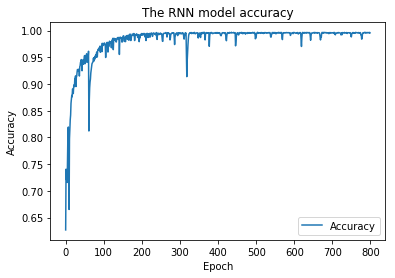


Final Cross-Validation Accuracy of RNN training model 0.9567341242149338 



In [10]:
# Fit model and Cross-Validation
RNN_history = RNN_model.fit(X_train, target_train, epochs=800, batch_size=64)
loss, accuracy = RNN_model.evaluate(X_test, target_test, verbose=1)
print('\nTesting Accuracy =', accuracy, '\n')


print(RNN_history.history.keys())
plt.plot(RNN_history.history['acc'])
#plt.plot(history.history['loss'])
plt.title('The RNN model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy'], loc='lower right')
plt.show()

print('\nFinal Cross-Validation Accuracy of RNN training model', accuracy, '\n')